# Indexing and Selecting Data


## Learning Objectives

- Select data by position using `.isel` with values or slices
- Select data by label using `.sel` with values or slices
- Select timeseries data by date/time with values or slices
- Use nearest-neighbor lookups with `.sel`


## Why do we need label-based indexing?

Scientific data is inherently labeled. For example, time series data includes
timestamps that label individual periods or points in time, spatial data has
coordinates (e.g. longitude, latitude, elevation), and model or laboratory
experiments are often identified by unique identifiers.


In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("../data/sst.mnmean.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    geospatial_lon_min:        -1.0
    geospatial_lon_max:        359.0
    geospatial_laty_max:       89.0
    geospatial_laty_min:       -89.0
    geospatial_lat_max:        89.0
    geospatial_lat_min:        -89.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    cdm_data_type:             Grid
    project:                   NOAA Extended Reconstructed Sea Surface Temper...
    original_publisher_url:    http://www.ncdc.noaa.gov
    References:                https://www.ncdc.noaa.gov/data-access/marineoc...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    title:                     NOAA ERSSTv5 (in situ only)
    history:                   created 07/2017 by PSD data using NCEI's ERSST...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    citation:                  Huang et al, 2017: Extended Reconstructed Sea ...
    platform:                  Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    standard_name_vocabulary:  CF Standard Name Table (v40, 25 January 2017)
    processing_level:          NOAA Level 4
    Conventions:               CF-1.6, ACDD-1.3
    metadata_link:             :metadata_link = https://doi.org/10.7289/V5T72...
    creator_name:              Boyin Huang (original)
    date_created:              2017-06-30T12:18:00Z (original)
    product_version:           Version 5
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

## NumPy Positional Indexing

When working with numpy, indexing is done by position (slices/ranges/scalars).


In [3]:
t = ds["sst"].data  # numpy array
t

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

In [4]:
t.shape

(128, 89, 180)

In [5]:
# extract a time-series for one spatial location
t[:, 20, 40]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

<div class="alert alert-block alert-warning">
but wait, what labels go with 10 and 20? Was that lat/lon or lon/lat? Where are the timestamps that go along with this time-series?
</div>


## Indexing with xarray

xarray offers extremely flexible indexing routines that combine the best
features of NumPy and pandas for data selection.


In [6]:
da = ds["sst"]  # Extract data array
da

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

- **NumPy style indexing still works (but preserves the labels/metadata)**


In [7]:
da[:, 20, 40]

<xarray.DataArray 'sst' (time: 128)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=float32)
Coordinates:
    lat      float32 48.0
    lon      float32 80.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

- **Positional indexing using dimension names**


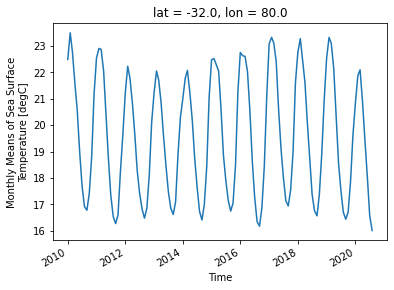

In [8]:
da.isel(lat=60, lon=40).plot()

- **Label-based indexing**


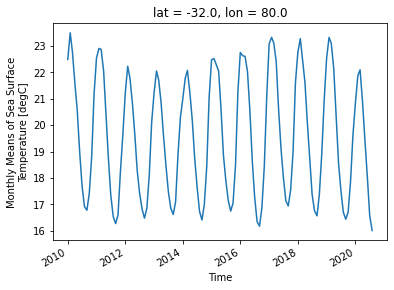

In [9]:
da.sel(lat=-32, lon=80).plot()

In [10]:
da.sel(lat=50.0, lon=200.0, time="2020")

<xarray.DataArray 'sst' (time: 8)>
array([ 5.501727,  5.015851,  4.808821,  5.837058,  7.285223,  8.64473 ,
       11.524967, 12.405846], dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [11]:
# demonstrate slicing
ds.sel(time=slice("2019-05", "2020-07"))

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 15)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2019-05-01 2019-06-01 ... 2020-07-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes:
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    geospatial_lon_min:        -1.0
    geospatial_lon_max:        359.0
    geospatial_laty_max:       89.0
    geospatial_laty_min:       -89.0
    geospatial_lat_max:        89.0
    geospatial_lat_min:        -89.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    cdm_data_type:             Grid
    project:                   NOAA Extended Reconstructed Sea Surface Temper...
    original_publisher_url:    http://www.ncdc.noaa.gov
    References:                https://www.ncdc.noaa.gov/data-access/marineoc...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    title:                     NOAA ERSSTv5 (in situ only)
    history:                   created 07/2017 by PSD data using NCEI's ERSST...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    citation:                  Huang et al, 2017: Extended Reconstructed Sea ...
    platform:                  Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    standard_name_vocabulary:  CF Standard Name Table (v40, 25 January 2017)
    processing_level:          NOAA Level 4
    Conventions:               CF-1.6, ACDD-1.3
    metadata_link:             :metadata_link = https://doi.org/10.7289/V5T72...
    creator_name:              Boyin Huang (original)
    date_created:              2017-06-30T12:18:00Z (original)
    product_version:           Version 5
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

- **Nearest Neighbor Lookups**


In [12]:
da.sel(lat=52.25, lon=251.8998, method="nearest")

<xarray.DataArray 'sst' (time: 128)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=float32)
Coordinates:
    lat      float32 52.0
    lon      float32 252.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

- **All of these indexing methods work on the dataset too:**


In [13]:
ds.sel(lat=52.25, lon=251.8998, method="nearest")

<xarray.Dataset>
Dimensions:  (time: 128)
Coordinates:
    lat      float32 52.0
    lon      float32 252.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    geospatial_lon_min:        -1.0
    geospatial_lon_max:        359.0
    geospatial_laty_max:       89.0
    geospatial_laty_min:       -89.0
    geospatial_lat_max:        89.0
    geospatial_lat_min:        -89.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    cdm_data_type:             Grid
    project:                   NOAA Extended Reconstructed Sea Surface Temper...
    original_publisher_url:    http://www.ncdc.noaa.gov
    References:                https://www.ncdc.noaa.gov/data-access/marineoc...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    title:                     NOAA ERSSTv5 (in situ only)
    history:                   created 07/2017 by PSD data using NCEI's ERSST...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    citation:                  Huang et al, 2017: Extended Reconstructed Sea ...
    platform:                  Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    standard_name_vocabulary:  CF Standard Name Table (v40, 25 January 2017)
    processing_level:          NOAA Level 4
    Conventions:               CF-1.6, ACDD-1.3
    metadata_link:             :metadata_link = https://doi.org/10.7289/V5T72...
    creator_name:              Boyin Huang (original)
    date_created:              2017-06-30T12:18:00Z (original)
    product_version:           Version 5
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

## Vectorized Indexing

Like numpy and pandas, xarray supports indexing many array elements at once in a
vectorized manner:


In [14]:
# generate a coordinates for a transect of points
lat_points = xr.DataArray([60, 80, 90], dims="points")
lon_points = xr.DataArray([250, 250, 250], dims="points")
lat_points

<xarray.DataArray (points: 3)>
array([60, 80, 90])
Dimensions without coordinates: points

In [15]:
lon_points

<xarray.DataArray (points: 3)>
array([250, 250, 250])
Dimensions without coordinates: points

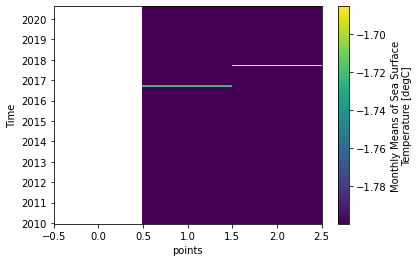

In [16]:
# nearest neighbor selection along the transect
da.sel(lat=lat_points, lon=lon_points, method="nearest").plot()

## Indexing with `where()`


In [17]:
# Let's replace the missing values (nan) with some placeholder
ds.sst.where(ds.sst.notnull(), -99)

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
...
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

## Going Further

- [Xarray Docs - Indexing and Selecting Data](https://xarray.pydata.org/en/stable/indexing.html)


<div class="alert alert-block alert-success">
  <p>Previous: <a href="01_xarray_fundamentals.ipynb">xarray fundamentals</a></p>
  <p>Next: <a href="03_computation.ipynb">Computation</a></p>
</div>
